
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
medical_df = pd.read_csv("drive/MyDrive/Machine Learning для людей/data/medical_charges/medical-charges.csv")
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Вплив BMI (індексу маси тіла): Люди з високим BMI (ожиріння) часто мають вищі медичні витрати, особливо якщо вони палять. Можна додати коефіцієнт підвищення вартості для людей з BMI > 30.
2. Розбити людей на декади (20-30, 30-40 років тощо) і для кожної групи рахувати середнє. Чим старша людина, тим вища страхова сума.
3. Створити просту таблицю "Курець + Ожиріння (BMI > 30)". Для цієї групи прогноз має бути максимальним (близько 40,000$+), для інших — значно нижчим.


---



**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [5]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges by Sex')
fig.update_layout(bargap=0.1)
fig.show()

Хоча медіанні значення (центральні лінії на бокс-плотах) для чоловіків та жінок близькі, розподіл для чоловіків (male) має довший правий "хвіст".

На гістограмі видно, що серед пацієнтів з найвищими витратами (понад $40k) чоловіків більше, ніж жінок. Це вказує на те, що чоловіки частіше потрапляють у категорію "дорогого лікування" (ймовірно, через вищий відсоток курців або хронічних захворювань).

In [6]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Annual Medical Charges by Region')
fig.update_layout(bargap=0.1)
fig.show()

Регіон southeast помітно виділяється серед інших. На гістограмі для цього регіону стовпчики у зоні високих витрат вищі, ніж у інших.

На бокс-плоті для southeast також видно найбільшу кількість викидів та ширший міжквартильний розмах. Це свідчить про те, що лікування в цьому регіоні в середньому обходиться дорожче, або там проживає більше людей з групи ризику.

Регіони southwest та northwest мають схожі, дещо спокійніші розподіли з меншими витратами.


---



**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [9]:
fig = px.histogram(medical_df, x='region', color='smoker', title='Smokers Distribution by Region', barmode='group')
fig.show()

Найбільша кількість курців проживає в регіоні southeast (південний схід). Це чітко видно за найвищим помаранчевим стовпчиком (категорія smoker='yes') на графіку.

Це спостереження допомагає пояснити висновки з попереднього завдання: саме в регіоні southeast ми бачили найвищі медичні витрати. Оскільки куріння значно здорожчує страховку, велика кількість курців у цьому регіоні "тягне" загальну статистику витрат вгору.

В інших трьох регіонах (northeast, northwest, southwest) кількість курців приблизно однакова і помітно менша, ніж на південному сході.

In [10]:
fig = px.histogram(medical_df, x='children', color='smoker', title='Smokers Distribution by Children Count', barmode='group')
fig.show()

Переважна більшість учасників вибірки взагалі не має дітей (категорія 0). Відповідно, і абсолютна кількість курців у цій групі найбільша.

Якщо дивитися на пропорцію (співвідношення курців до некурців), то наявність 1, 2 або 3 дітей суттєво не змінює картину — відсоток курців залишається стабільним.

У групах багатодітних сімей (4 та 5 дітей) кількість курців значно менша. Однак, варто зауважити, що і загальна вибірка людей з 5 дітьми дуже мала (всього 18 осіб), тому робити глобальні висновки про те, що "багатодітні менше палять", на основі лише цих даних може бути не зовсім коректно, хоча тенденція до зменшення простежується.


---



**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [13]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                box=True,
                points='all',
                color='children',
                title='Charges Distribution by Number of Children')
fig.show()

Графіки для людей, які мають від 0 до 4 дітей, мають дуже схожу форму: широка основа знизу (вказує на те, що більшість людей платять невеликі суми, близько $5,000–$10,000) і довгий тонкий "хвіст", що тягнеться вгору (до $40,000–$60,000).

Це свідчить про те, що наявність дітей сама по собі не є гарантією високих витрат; у кожній з цих груп є як "дешеві", так і "дорогі" пацієнти (ймовірно, курці).

Розподіл для людей з 5 дітьми виглядає інакше. Він значно коротший: максимальні витрати тут не перевищують $20,000 (відсутній довгий верхній "хвіст").

Це може пояснюватися дуже малою вибіркою (всього близько 18 осіб у цій категорії), серед яких випадково не виявилося курців або людей із серйозними захворюваннями, що зазвичай формують високі витрати.

Ми бачимо, що навіть бездітні люди (0 дітей) можуть мати одні з найвищих медичних рахунків (понад $60,000). Це підтверджує, що кількість дітей не є визначальним фактором для формування надвисоких витрат — інші фактори (куріння, BMI, вік) мають сильніший вплив.


---



**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [14]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [15]:
def estimate_charges(age, w, b):
    return w * age + b

In [16]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

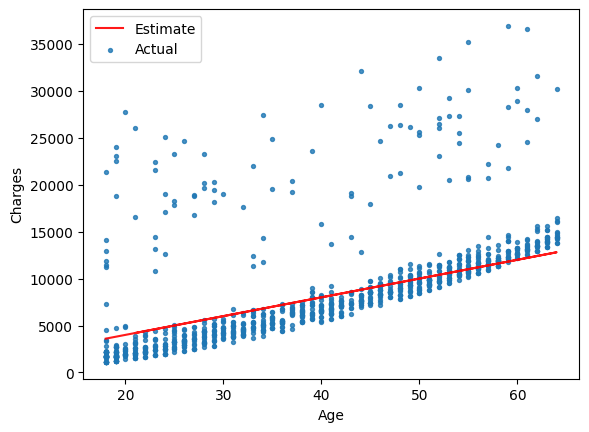

In [24]:
try_parameters(non_smoker_df, 200, 0)

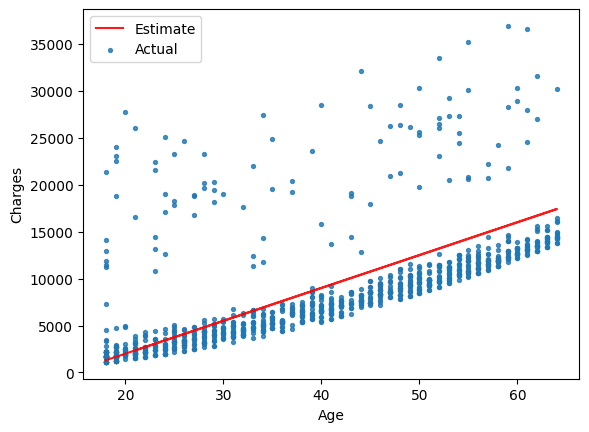

In [26]:
try_parameters(non_smoker_df, 350, -5000)

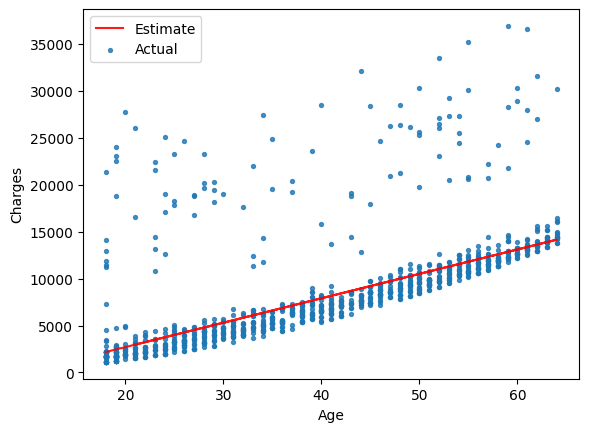

In [25]:
try_parameters(non_smoker_df, 260, -2500)

1. При $w=200$ лінія йде нижче більшості точок для старших людей.
2. При $w=350$ лінія занадто різко йде вгору, переоцінюючи витрати для літніх людей.
3. Параметри $w=260, b=-2500$ виглядають найкраще: лінія проходить майже посередині "хмари" точок.


---



**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [27]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

targets = non_smoker_df['charges']
ages = non_smoker_df['age']

rmse1 = rmse(targets, estimate_charges(ages, 200, 0))
rmse2 = rmse(targets, estimate_charges(ages, 350, -5000))
rmse3 = rmse(targets, estimate_charges(ages, 260, -2500))

print(f"RMSE (w=200, b=0): {rmse1:.2f}")
print(f"RMSE (w=350, b=-5000): {rmse2:.2f}")
print(f"RMSE (w=260, b=-2500): {rmse3:.2f}")

RMSE (w=200, b=0): 4790.15
RMSE (w=350, b=-5000): 4818.59
RMSE (w=260, b=-2500): 4714.99


Найнижче значення втрат (RMSE) буде у 3-ї спроби (4715).

Стратегія пошуку: Можна почати з довільної лінії, порахувати RMSE. Потім трохи змінити $w$ (збільшити/зменшити). Якщо RMSE впало — рухаємось далі в цьому напрямку. Якщо зросло — рухаємось назад.